# Analysis of Kaggle's Titanic Dataset
Author: Daniel Pipkin

Write something about the Titanic here. The dataset contains demographic and passenger information about passengers on the Titanic.

In [1]:
# Make plots show up in the notebook
%matplotlib inline

# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Bring an artist's touch to matplotlib's default styles
style.use('seaborn-pastel')

## Posing Questions

The two questions we are mainly focusing on:
* What factors made people more likely to survive? (Women, Children, Upper Class)
    More Women survived. What about children? More first-class passengers survived. Is there an alternative explanation.
* Was ticket price based on more than passenger class?

To answer these questions, I'm going to follow a simple loop:
1. Hypothesize an explanation for the question.
2. Gather items needed to investigate the hypothesis.
3. Investigate the relationship with one or more visualizations.
4. Draw a conclusion, then pose another hypothesis for further investigation.

## "I'll never let go, Jack!"

So what factors did contribute to the survival of some passengers? The one thing I remember from Titanic is that Jack dies and Rose lives. (That, and Leonardo Decaprio toasting like [he does in every movie](http://www.vulture.com/2013/06/gif-history-of-leo-dicaprio-raising-glasses.html)). Let's use this as a starting point.  
**Hypothesis:** Women survived more than men  
Now it's time to gather the needed information.

In [2]:
# Import the titanic data
titanic_data = pd.read_csv('titanic-data.csv')

This is what the first couple rows of data looks like.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems like the `Sex` column uses '`male`' and '`female`' values. Let's make sure that looks right.

In [4]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

Great! No surprises there. Now let's see how many of each group survived.

In [59]:
# Kaggle's website talks about the meaning of the
# 'Survived' column here: https://www.kaggle.com/c/titanic/data
# -- 1 means they made it.
survivors_mf = titanic_data.loc[titanic_data['Survived'] == 1, 'Sex']
survivors_mf.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [5]:
# Because 0 means no and 1 means yes, we can sum the `Survived` column to find total survivors
survivors_by_mf = titanic_data.groupby('Sex')['Survived'].sum()
survivors_by_mf

Sex
female    233
male      109
Name: Survived, dtype: int64

Wow! More than twice as many women survived than men, but it's much easier to notice those types of relationships in a chart.

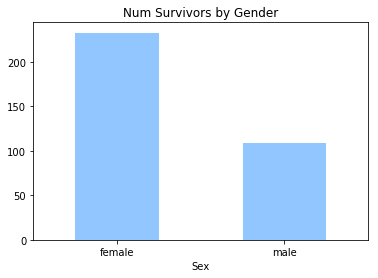

In [43]:
survivors_by_mf.plot(kind='bar', rot=0)
plt.title('Num Survivors by Gender')
plt.savefig('figures/num_survivors_by_gender.png')

By this might be deceptive. Maybe there were just more women on the titanic.

male      577
female    314
Name: Sex, dtype: int64

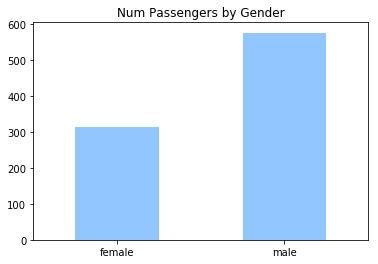

In [47]:
passengers_by_mf = titanic_data['Sex']
passengers_by_mf.value_counts() \
                .loc[['female', 'male']] \
                .plot(kind='bar', rot=0)
plt.title('Num Passengers by Gender')
passengers_by_mf.value_counts()

Normalize view so that it represents proportion of population

Sex
female    0.742038
male      0.188908
Name: 1, dtype: float64

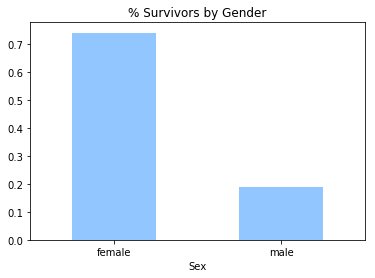

In [84]:
def group_normalize(group, by='Survived', df=titanic_data):
    return pd.crosstab(df[group], df[by], normalize=0)

normalized_mf_survivors = group_normalize('Sex') \
                          .loc[:, 1]
normalized_mf_survivors.plot(kind='bar', rot='0')
plt.title('% Survivors by Gender')
plt.savefig('figures/per_survivors_by_gender.png')
normalized_mf_survivors

It looks like an even higher percentage of females survived compared to males

## Women and Children First

Let's see how men, women, and children compare.

MWCh
child     0.591549
female    0.757143
male      0.162963
Name: 1, dtype: float64

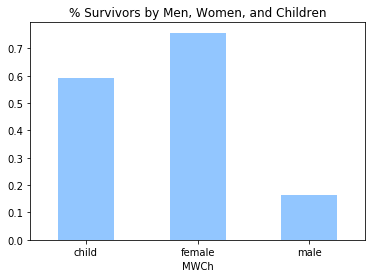

In [90]:
def to_mwch(row):
    if row['Age'] < 14:
        return 'child'
    else:
        return row['Sex']

mwch = titanic_data.apply(to_mwch, axis=1)
with_mwch = titanic_data.assign(MWCh=mwch)

normalized_mwch_survivors = group_normalize('MWCh', df=with_mwch) \
                            .loc[:, 1]
normalized_mwch_survivors.plot(kind='bar', rot='0')
plt.title('% Survivors by Men, Women, and Children')
plt.savefig('figures/per_survivors_mwch.png')
normalized_mwch_survivors